In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv("\Sixth Semester\Data Analysis and Visualization\Class\Project\CarsData.csv")

# Selecting numerical features for SVM
features = ['mileage', 'tax', 'mpg', 'engineSize']
target = 'price'

# Splitting the data into features (X) and target (y)
X = data[features]
y = data[target]

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Train the SVM model
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)

SVR()

In [6]:
# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 66816207.61277331
R-squared: 0.31984004734419624


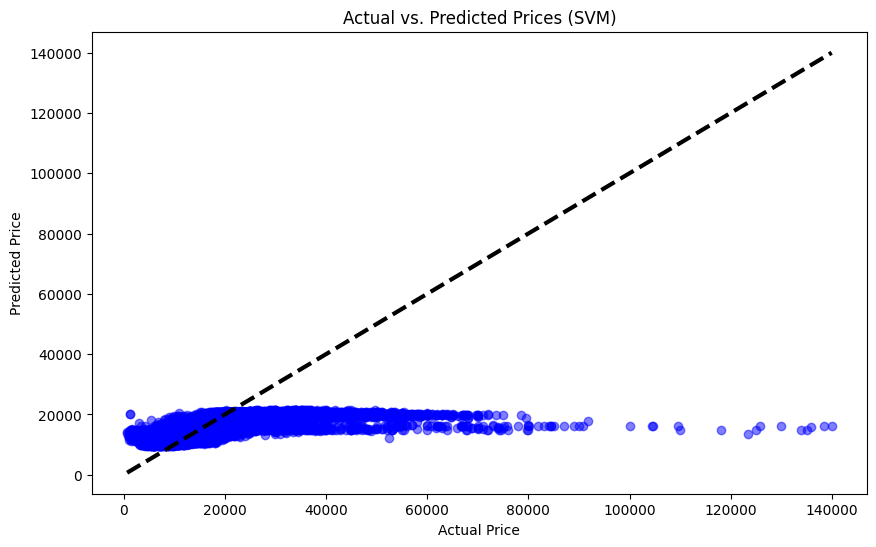

In [7]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (SVM)')
plt.show()

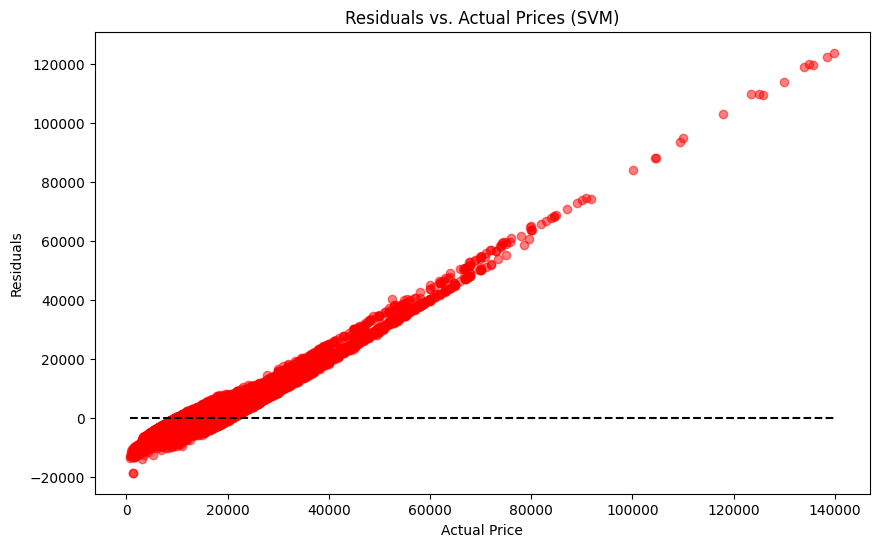

In [8]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='red', alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='black', linestyles='dashed')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Prices (SVM)')
plt.show()